#FIRST PROJECT SOLVED IN DATACAMP

# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops


Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.sample(10)

,N,P,K,ph,crop
1971,102,37,25,5.907931,cotton
1610,21,17,15,7.455991,orange
1262,32,130,196,6.372960,grapes
903,37,18,39,6.424671,pomegranate
534,36,57,16,8.292876,mothbeans
165,75,53,18,6.864794,maize
2157,115,31,30,6.840928,coffee
733,53,67,17,7.296972,blackgram
784,27,62,24,7.353877,blackgram
185,88,38,15,6.455117,maize


In [2]:
crops.shape

(2200, 5)

In [3]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [4]:
crops['crop'].value_counts().keys()

Index(['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange',
       'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana',
       'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans',
       'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'],
      dtype='object')

In [5]:
len(crops['crop'].value_counts().keys())

22

In [6]:
crops['crop'].value_counts().keys()

Index(['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange',
       'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana',
       'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans',
       'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'],
      dtype='object')

#making a little analysis for each feature
To observe how the crop type varies in relation to each feature, it is very simple to see if any pattern exists in the dataset

Text(0, 0.5, 'Crop type')

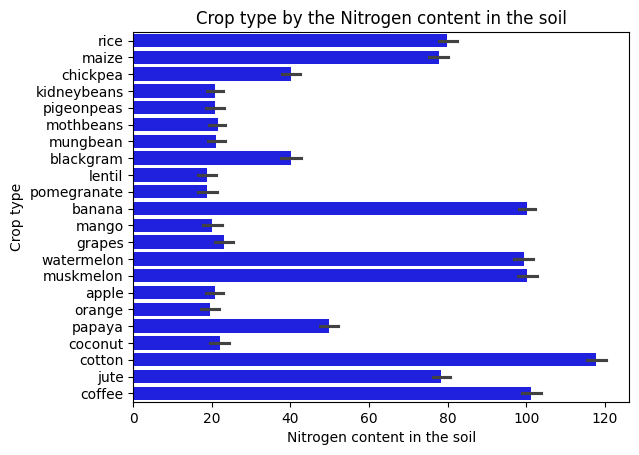

In [7]:
sns.barplot(y = "crop", x = "N", data=crops, estimator = np.mean,color='blue')
plt.title('Crop type by the Nitrogen content in the soil')
plt.xlabel('Nitrogen content in the soil')
plt.ylabel('Crop type')

Text(0, 0.5, 'Crop type')

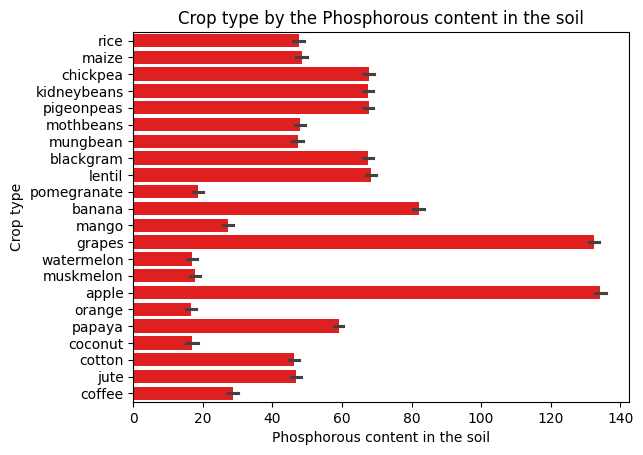

In [8]:

sns.barplot(y = "crop", x = "P", data=crops, estimator = np.mean,color='red')
plt.title('Crop type by the Phosphorous content in the soil')
plt.xlabel('Phosphorous content in the soil')
plt.ylabel('Crop type')

Text(0, 0.5, 'Crop type')

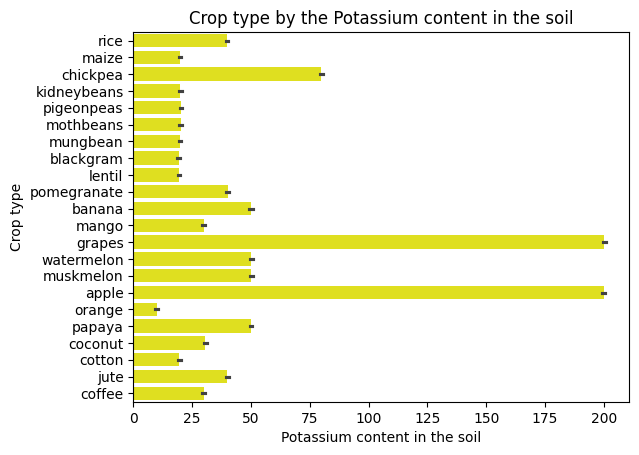

In [9]:
sns.barplot(y = "crop", x = "K", data=crops, estimator = np.mean,color='yellow')
plt.title('Crop type by the Potassium content in the soil')
plt.xlabel('Potassium content in the soil')
plt.ylabel('Crop type')

Text(0, 0.5, 'Crop type')

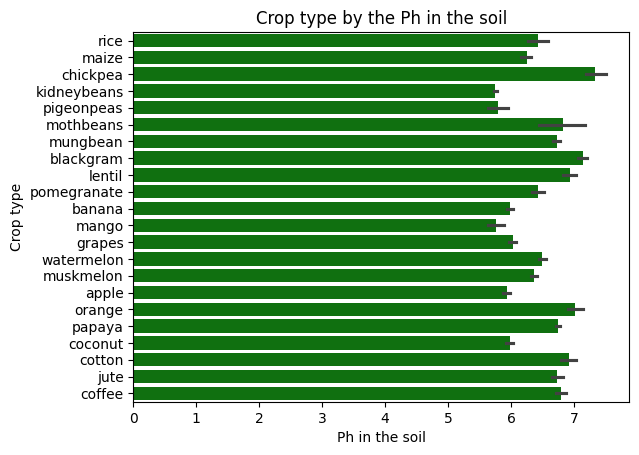

In [10]:
sns.barplot(y = "crop", x = "ph", data=crops, estimator = np.mean,color='green')
plt.title('Crop type by the Ph in the soil')
plt.xlabel('Ph in the soil')
plt.ylabel('Crop type')


#Splitting data

In [12]:
X = crops.drop(columns='crop')
y = crops['crop']

In [13]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Training and evaluating the model for each feature
We created a dictionary to store the performance of each feature in the model. We tried to determine which feature is most relevant for predicting crop type. We trained and tested each feature with a logistic regression model and, finally, we evaluated each model using the F1 score metric.

In [14]:
scores = {}
for feature in ['N','P','K', 'ph']:
    logr = LogisticRegression(multi_class='multinomial')
    logr.fit(X_train[[feature]], y_train)
    pred = logr.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, pred, average='weighted')
    scores[feature] = feature_performance
    print(f"F1-score for {feature}: {feature_performance}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for N: 0.09885579148347877


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for P: 0.14549350124470606


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-score for K: 0.24686857321875638
F1-score for ph: 0.04974842411769599


#Result
The result and conclusion of this project is that the most relevant feature for determining the type of crop is 'K', which represents the Potassium content in the soil. This feature achieved an F1 score of 0.2468, indicating its significance in predicting or identifying the type of crop based on this particular attribute

In [16]:
best_predictive_feature = {'K':scores['K']}
best_predictive_feature

{'K': 0.24686857321875638}